<a href="https://colab.research.google.com/github/adefirmanf/single-maze-rl/blob/release/Simple_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's build simple game that has a grid with 1 row only. 

Here the idea : 
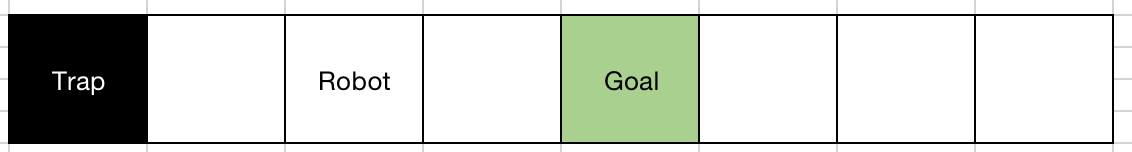





Assume we have a Robot that should reach the Goal without touching the Trap. The robot only have 2 actions, left & right.

Let's convert the environment (grid) into the matrix. 
Environment (State) : <br>
`S = [0,0,0,0,0,0,0,0]`

Action : <br>
`A = [0,0] `

The value of Action could be 0 & 1. 0 = Left, 1 = Right.

Since the formula for Q (Quality) is Q(s,a) so we can sum up into the 2D Matrix : <br> 
`[[actions], [actions], [actions], [actions], ...n[actions]`



In [ ]:
import numpy as np

In [ ]:
column = 8
actions = ['left', 'right']

q = np.zeros((column, len(actions)))


In [ ]:
## Initialize Environment
rewards = np.full((column), -1)

rewards[0] =  -100
rewards[4] = 100

print(rewards)

[-100   -1   -1   -1  100   -1   -1   -1]


In [ ]:
## Define functions
def is_available_state(c):
  ## Boundaries check to avoid index out of range
  if rewards[c] == -1:
    return True 
  else :
    return False

## Get Starting Location 
def get_starting_location():
  current_column = np.random.randint(column)
  while not is_available_state(current_column):
    current_column = np.random.randint(column)
  return current_column

## Get Next Actions 
epiloch = 0.9
def get_next_actions(column, epiloch):
  rand = np.random.random()
  if rand < epiloch:
    i_action = np.argmax(q[column])
  else : 
    i_action = np.random.randint(len(actions))
  return i_action

def get_next_locations(column_pos, action):
  ## If actions going to the left, column - 1 => Start pos : [0,0,1,0] Action pos : [0,1,0,0]
  ## If actions going to the right, column + 1  => Start pos : [0,1,0,0] Action pos : [0,0,1,0]
  new_column_pos = column_pos
  if action == 0 and column_pos > 0 and column_pos < column: ## left
    new_column_pos -= 1 
  if action == 1 and column_pos > 0 and column_pos < column: ## right
    if column_pos != (column - 1):
      new_column_pos += 1
  return new_column_pos

def get_shortest_path(column_pos):
  if not is_available_state(column_pos):
    return []
  else:
    path = []
    current_position = column_pos
    path.append([current_position])

    while is_available_state(current_position):
      index_actions = get_next_actions(current_position, 1.)
      current_position = get_next_locations(current_position, index_actions)
      path.append([current_position])
    return path

## Since our QValue doesn't has any value, 
## our argmax inside next_actions function always return 0 
## The output always [left, left]
print(get_shortest_path(3))


[[3], [2], [1], [0]]


In [ ]:
epsilion = 0.9
discount_factor = 0.9
learning_rate = 0.9

for episode in range(100):
  column_index = get_starting_location()
  
  while is_available_state(column_index):
    action_index = get_next_actions(column_index, epsilion)
    old_column_index = column_index

    column_index = get_next_locations(column_index, action_index)
    reward = rewards[column_index]
    old_q_value = q[old_column_index][action_index]

    temporal_difference = reward + (discount_factor * np.max(q[column_index])) - old_q_value
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q[old_column_index][action_index] = new_q_value


print(q)
print('Training complete!')


[[  0.           0.        ]
 [-99.9         79.1       ]
 [ 70.1899013   89.        ]
 [ 79.01926174 100.        ]
 [  0.           0.        ]
 [100.          78.309     ]
 [ 89.          63.081     ]
 [ 79.1          0.        ]]
Training complete!


In [ ]:
print(get_shortest_path(7))
print(get_shortest_path(1))

[[7], [6], [5], [4]]
[[1], [2], [3], [4]]
